### **Лабораторная работа № 1**
### Персептроны. Процедура обучения Розенблатта

Цель работы: исследование свойств персептрона Розенблатта и его применение для решения задачи распознавания образов

Выполнил: Семин А. В., М8О-406Б-20

Вариант 21.

#### 1. Выполним классификацию множества точек на 2 класса

Импортируем нужные библиотеки

In [1]:
import numpy as np
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

Инициализируем данные наборы точек и создаем тензор для обучения

In [2]:
x1 = [2.6, -4, -1.5, 0.2, -3.3, 4]
y1 = [3.1, -3.3,  -4.5, -1.7, -3, 1.7]
c1 = [0, 1, 1, 0, 1, 0]

x_train = torch.FloatTensor(np.array(list(zip(x1, y1))))
y_train = torch.FloatTensor(np.array(c1))

Определяем класс персептрона, выполняющий перемножение матрицы весов и матрицы входа с прибавлением вектора смещения

In [3]:
class Perceptron(nn.Module):
    def __init__(self, in_features, out_features, bias=True):
        super(Perceptron, self).__init__()
        self.weights = nn.Parameter(torch.randn(in_features, out_features))
        if bias:
            self.bias_term = nn.Parameter(torch.randn(out_features))
        else:
            self.register_parameter('bias_term', None)

    def forward(self, x):
        x = x @ self.weights
        if self.bias_term is not None:
            x += self.bias_term
        return x


Определенный персептрон принимает координаты, на выходе имеет один нейрон. Функцию потерь выберем L1Loss, оптимизатор Adam. Выбрана именно L1Loss, поскольку она вычисляет среднюю абсолютную ошибку (MAE)

In [4]:
perc = Perceptron(2, 1)
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(perc.parameters(), lr=0.05)

Определяем функцию обучения модели для классификации набора точек на два множества

In [5]:
def fit(model, x_train, y_train, criterion, optimizer, epochs):
    losses = []
        
    for epoch in range(epochs):
        optimizer.zero_grad()
        outp = model(x_train)

        probs = torch.sigmoid(outp).flatten()
        loss = criterion(probs, y_train)

        loss.backward()
        losses.append(loss.item())
        optimizer.step()
        if (epoch +1) % 100 == 0:
            print(f'Epoch = {epoch + 1}, t_loss = {loss}')
    return losses


Обучаем модель

In [6]:
losses = fit(perc, x_train, y_train, loss_function, optimizer, 1000)

Epoch = 100, t_loss = 0.0069140102714300156
Epoch = 200, t_loss = 0.0022898155730217695
Epoch = 300, t_loss = 0.0012535307323560119
Epoch = 400, t_loss = 0.000813026970718056
Epoch = 500, t_loss = 0.000578198058065027
Epoch = 600, t_loss = 0.00043589924462139606
Epoch = 700, t_loss = 0.0003421295841690153
Epoch = 800, t_loss = 0.0002765638055279851
Epoch = 900, t_loss = 0.00022868959058541805
Epoch = 1000, t_loss = 0.00019245808653067797


Отрисуем график функции потерь (ошибка вычисляется между данными и результирующими вычислениями)

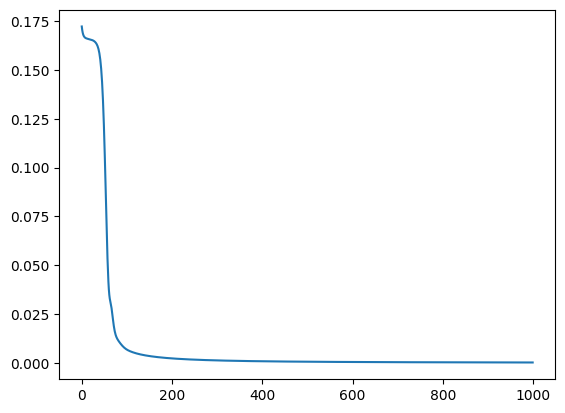

In [7]:
plt.plot(losses)
plt.show()

In [8]:
w = perc.weights.detach().flatten().numpy()
b = perc.bias_term.detach().flatten().numpy()

Построим прямую, отражающую результат бинарной классификации

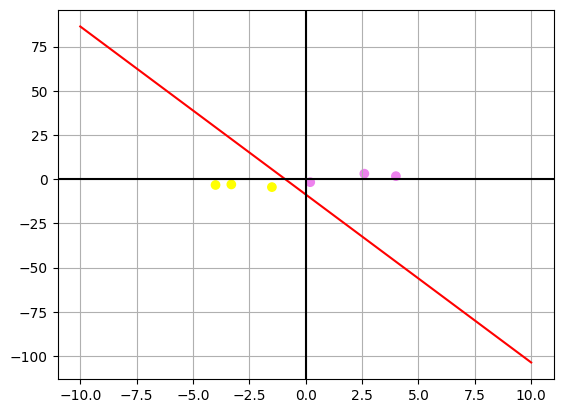

In [9]:
def discriminant(x, weights, bias):
    return (-x * weights[0] - bias[0]) / weights[1]

X = np.linspace(-10, 10, 100)

plt.plot(X, discriminant(X, w, b), "red")

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
colors = np.where(y_train == 1, 'yellow', 'violet')
plt.scatter(x1, y1, c=colors)

plt.show()


#### 2. Выполним аналогичные шаги для классификации двух множеств точек на 4 класса

Инициализируем данные наборы точек и создаем тензоры для обучения

In [10]:
x2 = [-1.2, -2.5, 1.1, 3.2, 2.3, 0.8,4, 3.1]
y2 = [0.8, -2.1, -2.4, 4.8, -1.6, -4, -3.7, -2.4]
c2_1 = [1, 1, 0, 1, 0, 0, 0, 0]
c2_2 = [1, 1, 1, 0, 0, 1, 0, 0]

x_train2 = torch.FloatTensor(np.array(list(zip(x2, y2))))
y_train2 = torch.FloatTensor(np.array(list(zip(c2_1, c2_2))))

Класс персептрона уже определен, используем его же. Новый пересптрон принимает на вход так же, как и прошлый, два признака - координаты, но на выходе имеет два нейрона. Аналогично функция потерь - L1Loss, оптимизатор - Adam.

In [11]:
perc2 = Perceptron(2, 2)
loss_function = nn.L1Loss()
optimizer = torch.optim.Adam(perc2.parameters(), lr=0.05)

Определяем функцию обучения модели для классификации набора точек на 4 множества

In [12]:
def fit2(model, x_train, y_train, criterion, optimizer, epochs):
    losses = []
    for epoch in range(epochs):
        optimizer.zero_grad()
        outp = model(x_train)

        probaba = torch.sigmoid(outp)

        losses_per_class = [criterion(probaba[:, i], y_train[:, i]) for i in range(y_train.shape[1])]
        loss = sum(losses_per_class)

        loss.backward()
        losses.append(loss.item())
        optimizer.step()
      
        if (epoch +1) % 100 == 0:
            print(f'Epoch = {epoch + 1}, t_loss = {loss}')
    return losses


Обучаем модель

In [13]:
losses2 = fit2(perc2, x_train2, y_train2, loss_function, optimizer, 1000)

Epoch = 100, t_loss = 0.03575677424669266
Epoch = 200, t_loss = 0.015312082134187222
Epoch = 300, t_loss = 0.00885061826556921
Epoch = 400, t_loss = 0.005876454524695873
Epoch = 500, t_loss = 0.004232106264680624
Epoch = 600, t_loss = 0.003215139266103506
Epoch = 700, t_loss = 0.0025364942848682404
Epoch = 800, t_loss = 0.0020580608397722244
Epoch = 900, t_loss = 0.001706422888673842
Epoch = 1000, t_loss = 0.0014393822057172656


График потерь

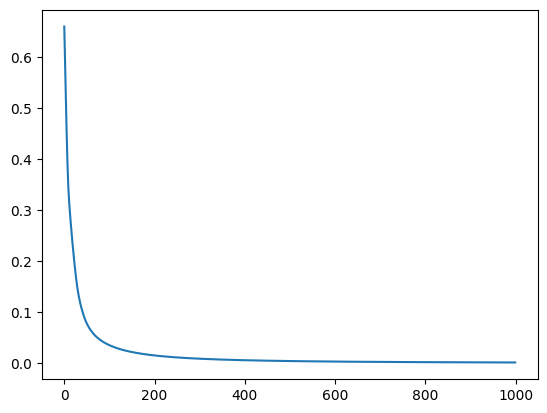

In [14]:
plt.plot(losses2)
plt.show()

In [15]:
w = perc2.weights.detach().clone().numpy()
b = perc2.bias_term.detach().clone().numpy()

In [16]:
def reverse_one_hot(arr):
    arr_new = []
    for i, y in enumerate(arr):
        arr_new.append(int(str(y[0]) + str(y[1]), 2))
    return np.array(arr_new)

Построим разделяющие прямые, отражающие классификацию наборов точек на 4 класса

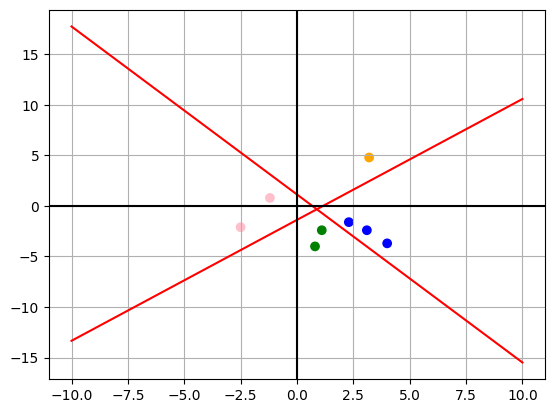

In [17]:
X = np.linspace(-10, 10, 100)

def discriminant(x, w, b, idx):
    return (-x * w[0][idx] - b[0]) / w[1][idx]

def get_color(c):
    cmap = {0: 'blue', 1: 'green', 2: 'orange'}
    return cmap.get(c, 'pink')

y_train2_rev = reverse_one_hot(y_train2.to(torch.int).numpy())
discriminant1_values = discriminant(X, w, b, 0)
discriminant2_values = discriminant(X, w, b, 1)

plt.plot(X, discriminant1_values, "red")
plt.plot(X, discriminant2_values, "red")

plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

colors = np.array([get_color(c) for c in y_train2_rev])
plt.scatter(x2, y2, c=colors)

plt.show()


**Выводы:** в ходе данной работы была построена модель персептрона Розенблатта, которая в результате обучения смогла выполнить классификацию точек на 2 и на 4 класса. Персептрон - простейшая нейросеть, которая позволяет решать задачи линейного разделения множеств. Однако всегда следует помнить о том, что персептрон имеет свои ограничения, например, ограниченная способность обучения сложным нелинейным зависимостям в силу простоты своего устройства.
Выполнение данной лабораторной работы позволило лучше понять принципы работы персептрона и его свойства.